In [1]:
import numpy as np # for array handling
import matplotlib.pyplot as plt #for plotting purposes
import scipy.special  #needed for error function

In [2]:
def gaussian(sigma=1, mu=0, x=0):
    #sigma = standard deviation away from mean
    #mu    = mean of x
    #x     = parameter on axis
    factor   = (1./ (sigma * np.sqrt(2*np.pi)))
    exponent = -0.5 *(((x- mu)/sigma)**2)
    PDF      = factor * np.exp(exponent)
    return PDF #this is not a probability (no surface just infinitdecimal PDF)

def CDFgaussian(sigma=1, mu=0, x=0):
    #sigma = standard deviation away from mean
    #mu    = mean of x
    #x     = parameter on axis
    factor = (x - mu) / (sigma * np.sqrt(2))
    erf    = scipy.special.erf( factor)
    CDF    = 0.5 * ( 1 + erf )
    return CDF #This is the cumulative of the PDF (from 0 till x) 

def inverseCDFgaussian(CDF=1, sigma=0, mu=0):
    #sigma = standard deviation away from mean
    #mu    = mean of x
    #x     = parameter on axis
    
    #scipy.special.erfinv(factor) only has a unique solution if
    #factor between -1 < factor < 1
    
    # CDF is between 0 and 1
    #CDF = 0.5 (1 + erf) -> 2 * CDF = 1+erf -> erf = 2*CDF -1
    #  2*CDF -1 is between 0 and 1
    erf_factor = CDF*2. - 1.
    
    factor = scipy.special.erfinv(erf_factor)
    x      = (factor * (sigma * np.sqrt(2))) + mu
    return x


def randomGaussianDistributedValue(sigma=1, mu=0, max_val=None, min_val=None):
    #The value is randomly distributed according to a Gaussian
    #However, there might be a abrupt max or min value where the PDF is set to 0
    #i.e. if max or min_val are not None it is not really a Gaussian anymore
    if max_val is None:
        CDF_max = 1
    else:
        CDF_max = CDFgaussian(sigma=sigma, mu=mu, x=max_val)
    if min_val is None:
        CDF_min = 0
    else:
        CDF_min = CDFgaussian(sigma=sigma, mu=mu, x=max_val)
    
    CDF_value  = np.random.uniform() # give random single nummber between 0-1
    
    
    coordinate = inverseCDFgaussian(CDF=CDF_value, sigma=sigma, mu=mu)
    return coordinate

def createRandomPolygonGivenCornersCentreRadius(nr_of_corners = 3,typeAngles='random',\
                                                x_0=0, y_0=0, radius=0, std_rad=0.4):
    
            
    
    
    #I now have a cirle with radius r centred at x and y.
    # I want three points on the circle in radians (i.e. number between 0 - 2pi)
    corners = []
    rotation = np.random.uniform() * 2 * np.pi
    for i in range(nr_of_corners):
        if typeAngles == 'random':
        #uncomment below for truly random lattices polygon
            rad = np.random.uniform() * 2 * np.pi
        
        if typeAngles == 'equal':
        #uncomment below for equallatteral polygon
            increment = (2 * np.pi) / nr_of_corners
            rad = increment*i + rotation
        
        if typeAngles == 'equalish':
            #uncomment below for bias towards equallatteral but still random
            increment = (2 * np.pi) / nr_of_corners
            rad = increment*i + rotation
            #draw random 
            rad +=randomGaussianDistributedValue(sigma=std_rad, mu=0)
        
        corners.append(rad)
    #sort radians so you can connect in order
    corners = np.sort(corners)
    #Each corner lies on a circle with radius r centred at x_0 and y_0
    #Oldskool trigonometry
    #r = x^2 + y^2
    #y = r sin(rad)
    #x = r cos(rad
    coordinates =[]
    for rad in corners:
        y = np.sin(rad) * radius + y_0
        x = np.cos(rad) * radius + x_0
        coordinates.append((x,y))
    
    return coordinates

def drawOutlinePolygon(coordinates, colour='k', zorder=1):
    
    nr_of_corners = len(coordinates)
    
    for i in range(nr_of_corners):
        x_values = [coordinates[i-1][0], coordinates[i][0]]
        y_values = [coordinates[i-1][1], coordinates[i][1]]
        axes.plot(x_values, y_values, c=colour, zorder=zorder, solid_capstyle='round')
    return

def colourInsidePolygon(coordinates, colour='k', zorder=1):
    nr_of_corners = len(coordinates)
    x_values = []
    y_values = []
    for i in range(nr_of_corners):
        x_values.append(coordinates[i][0])
        y_values.append(coordinates[i][1])
    axes.fill(x_values,y_values, colour, alpha=1., zorder=zorder)
    return


def reduceSigma(x=None, x_total=None ,slope=-1, sigma_max=2):
    dx =  x_total-x
    return max(sigma_max - slope*dx, 0.1)


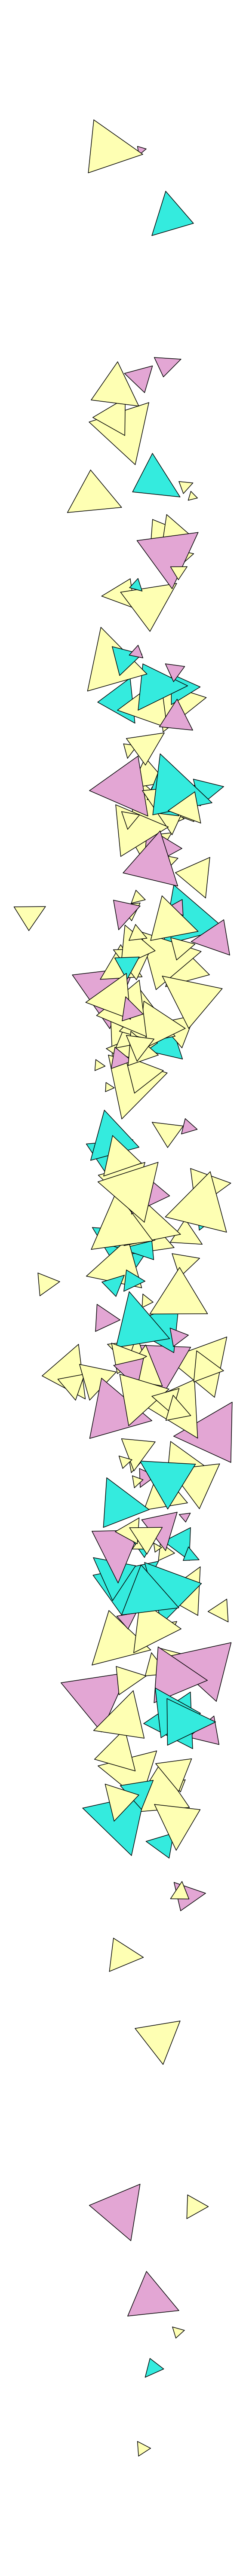

In [10]:
fig, axes = plt.subplots(1,1)
axes.axis('off')

nr_figures = 200
corners = 3

typeAngles = 'equalish'
std_rad = 0.1

colours = ['#34ebde', '#feffb3', '#e3a6d4']

for i in range(nr_figures):
    #figure is centred at x_0, y_0
    x_0 = randomGaussianDistributedValue(sigma=30, mu=0, max_val=None, min_val=None)
    #linearly reduce Y-sigma depending on x
    sigma_y_max =3
    slope = -0.2
    #sigma_y = reduceSigma(x=x_0,x_total=20, slope=slope, sigma_max=sigma_y_max)
    y_0 = randomGaussianDistributedValue(sigma=2, mu=0, max_val=None, min_val=None)
    radius = np.random.uniform(0.3, 2.5)
    polygon = createRandomPolygonGivenCornersCentreRadius(nr_of_corners = corners,typeAngles=typeAngles,\
                                                          x_0=y_0, y_0=x_0, radius=radius, std_rad=std_rad)
    drawOutlinePolygon(polygon, zorder=i)
    colour = colours[np.int(np.round(np.random.uniform()*(len(colours)-1)))]
    colourInsidePolygon(polygon, colour=colour, zorder=i)
    
y_lim = axes.get_ylim()
x_lim = axes.get_xlim()
#x_lim = (0, x_lim[1])

axes.set_xlim(x_lim)
#show in proper ratio
lengthY = y_lim[1]-y_lim[0]
lengthX = x_lim[1]-x_lim[0]
ratio = lengthY/lengthX
figsizeX = 10
fig.set_figheight(ratio*figsizeX)
fig.set_figwidth(figsizeX)

string = str(nr_figures) +'_'+ str(corners) + str(std_rad)+ '-' + typeAngles+'_' + str(sigma_y_max)+'_'+str(slope)+'.svg'
string = "Filler_Triangles.svg"
plt.savefig(string, transparent=True)
